<a href="https://colab.research.google.com/github/A01246519/Limpieza_Credicel/blob/main/Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()


In [3]:
#Carga desde un archivo .csv sin indice
df= pd.read_excel('cuentas_credicel.xlsx')
df.head()

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,Cancelado,0.0,0.0,0.0,0,0,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12,Mora,0.0,0,0.0,0.0,0.0,NaN,NaN,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [5]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         4197
puntos                3595
riesgo                2473
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64

COMBINACIÓN 1: NULOS MEDIA Y RANGO INTERCUARTILICO

In [7]:
df["riesgo"]=df["riesgo"].replace({"Atraso":00}, regex=False)
df["riesgo"]=df["riesgo"].replace({"Cancelado":00} , regex=False)
df["riesgo"]=df["riesgo"].replace({"Fraude":00}, regex=False)
#df["riesgo"]=df["riesgo"].replace({" ":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"''":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"'":""}, regex=False)
#df['riesgo']= df['riesgo'].astype(float)

In [8]:
df['riesgo'].max()

103.0

In [9]:
df["porc_enganche"]=df["porc_enganche"].replace({" ":00}, regex=False)
df["porc_enganche"]=df["porc_enganche"].replace({"":00}, regex=False)
#df['porc_enganche']= df['porc_enganche'].astype(float)

In [10]:
df['porc_enganche'].max()

48.0

In [11]:
grupos = df.groupby(['semana_actual'])['semana_actual'].count()

grupos

semana_actual
-3.8           1
-2.38          6
-2.24          7
-2.13          1
-2             1
              ..
K0,J0,E2,M1    8
K0,J0,E2,P9    2
K0,J0,F7,D8    5
K0,J0,P9,D8    1
K0,J0,P9,E2    1
Name: semana_actual, Length: 218, dtype: int64

In [12]:

#Variables cuantitativas
df["fecha_ultimo_pago"] =df["fecha_ultimo_pago"].fillna(method="bfill")
df["fecha_pago_proximo"] =df["fecha_pago_proximo"].fillna(method="bfill")
df["puntos"]=df["puntos"].fillna(round(df["puntos"].mean(),1))
df["riesgo"]=df["riesgo"].fillna(round(df["riesgo"].mean(),1))
df["porc_enganche"]=df["porc_enganche"].fillna(round(df["porc_enganche"].mean(),1))
df["semana_actual"] =df["semana_actual"].fillna(00)


In [13]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago        0
fecha_pago_proximo       0
status_cuenta         4197
puntos                   0
riesgo                   0
porc_enganche            0
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual            0
codigo_postal          685
dtype: int64

In [14]:
#Variables cualitativas
df["status_cuenta"] =df["status_cuenta"].fillna("DESCONOCIDO")
df["codigo_postal"] =df["codigo_postal"].fillna("DESCONOCIDO")
df["razones_buro"] =df["razones_buro"].fillna("DESCONOCIDO")
df["empresa"] =df["empresa"].fillna("DESCONOCIDO")

In [15]:
#Otras Variables
df["codigo_postal"] =df["codigo_postal"].fillna(0)

In [16]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

MÉTODO: RANGO INTERCUARTILICO

In [17]:
df_intercuartilico=df.loc[ : , ["precio", "enganche", "descuento", "semana", "monto_financiado", "costo_total", "monto_accesorios",
                                "pagos_realizados", "puntos", "riesgo", "porc_enganche", "porc_tasa", "score_buro", "semana_actual"]]
df_intercuartilico

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


In [18]:
df_cuali=df.loc[ : , ["folio", "tag", "folio_solicitud", "fecha", "marca", "modelo", "plazo", "agente_venta", "dis_venta", "status",
                       "fraude", "empresa", "inversion", "reautorizacion", "fecha_ultimo_pago", "fecha_pago_proximo", "status_cuenta",
                       "codigo_postal","razones_buro"]]
df_cuali

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,fraude,empresa,inversion,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,codigo_postal,razones_buro
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,DESCONOCIDO,0
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,Mora,74,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,0,servicel,0,0,2023-04-18 18:45:00,2023-04-25,DESCONOCIDO,0,0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,0,pixelulares,0,0,2023-04-18 18:46:53,2023-04-25,DESCONOCIDO,0,0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,0,DESCONOCIDO,0,0,2023-04-18 18:47:47,2023-04-25,DESCONOCIDO,0,0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,0,grupoph,0,0,2023-04-18 18:49:08,2023-04-25,DESCONOCIDO,0,0


<Figure size 1500x800 with 0 Axes>

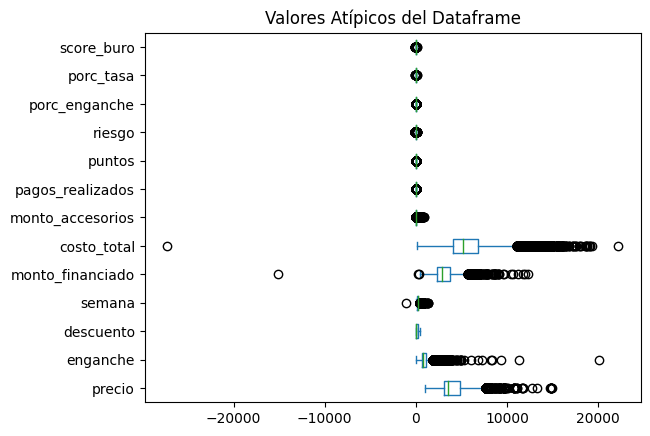

In [19]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_intercuartilico.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [20]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_intercuartilico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido precio               7674.000
enganche             1841.750
descuento             500.000
semana                457.500
monto_financiado     5703.000
costo_total         11108.500
monto_accesorios        0.000
pagos_realizados       34.500
puntos                 18.750
riesgo                 51.675
porc_enganche           5.230
porc_tasa               0.000
score_buro              0.000
dtype: float64
Limite inferior permitido precio              274.000
enganche           -104.250
descuento          -300.000
semana               -2.500
monto_financiado    359.000
costo_total        -175.500
monto_accesorios      0.000
pagos_realizados    -17.500
puntos                6.350
riesgo              -34.525
porc_enganche        -5.650
porc_tasa             0.000
score_buro            0.000
dtype: float64


<ipython-input-20-e53faff63758>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-20-e53faff63758>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [21]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-21-faf20dfc84f1>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= df_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.40,-1.13,NaN,NaN
22731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,7.48,NaN,NaN
22732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.65,0.75,NaN,NaN
22733,9799.0,2799.0,NaN,NaN,7000.0,15054.0,NaN,NaN,NaN,NaN,-17.35,-0.14,NaN,NaN


In [22]:
#Obtenemos datos limpios del Dataframe
data_iqr= df_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-22-9fdf437ea3d1>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= df_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.0,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,NaN,NaN,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,NaN,NaN,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,NaN,NaN,0.0,NaN
22733,NaN,NaN,0.0,386.0,NaN,NaN,0.0,0.0,14.1,14.0,NaN,NaN,0.0,NaN


In [23]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

precio                309
enganche              871
descuento               0
semana                946
monto_financiado      497
costo_total           787
monto_accesorios     1854
pagos_realizados      534
puntos               4415
riesgo                193
porc_enganche        1917
porc_tasa            3044
score_buro           1806
semana_actual       22735
dtype: int64

In [24]:
#Reemplazamos valores atípicos (nulos) con "mean"
data1_iqr=data_iqr.copy()
data1_iqr=data1_iqr.fillna(round(data_iqr.mean(),1))
data1_iqr

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.0,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,12.1,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,-0.4,0.0,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,-0.4,0.0,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,-0.4,0.0,0.0,NaN
22733,3935.5,866.9,0.0,386.0,3001.8,5448.5,0.0,0.0,14.1,14.0,-0.4,0.0,0.0,NaN


In [25]:
Datos_credicel_limpios1= pd.concat([df_cuali, df_intercuartilico], axis=1)
Datos_credicel_limpios1

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


In [26]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_credicel_limpios1.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
codigo_postal         0
razones_buro          0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
pagos_realizados      0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
semana_actual         0
dtype: int64

In [ ]:
#Convertir DataFrame a xlsx
Datos_credicel_limpios1.to_excel("Datos_credicel_limpios1.xlsx")

In [ ]:
#descargar archivo filtrado en xlsx
from google.colab import files


files.download("Datos_credicel_limpios1.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

COMBINACIÓN 2: NULOS MEDIA Y DESVIACIÓN ESTANDAR

In [28]:
df1 = pd.read_excel('cuentas_credicel.xlsx')

In [29]:
df1["riesgo"]=df1["riesgo"].replace({"Atraso":00}, regex=False)
df1["riesgo"]=df1["riesgo"].replace({"Cancelado":00} , regex=False)
df1["riesgo"]=df1["riesgo"].replace({"Fraude":00}, regex=False)
#df["riesgo"]=df["riesgo"].replace({" ":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"''":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"'":""}, regex=False)
df1['riesgo']= df1['riesgo'].astype(float)
df1["porc_enganche"]=df1["porc_enganche"].replace({" ":00}, regex=False)
df1["porc_enganche"]=df1["porc_enganche"].replace({"":00}, regex=False)
df1['porc_enganche']= df1['porc_enganche'].astype(float)

In [30]:

#Variables cuantitativas
df1["fecha_ultimo_pago"] =df1["fecha_ultimo_pago"].fillna(method="bfill")
df1["fecha_pago_proximo"] =df1["fecha_pago_proximo"].fillna(method="bfill")
df1["puntos"]=df1["puntos"].fillna(round(df["puntos"].mean(),1))
df1["riesgo"]=df1["riesgo"].fillna(round(df["riesgo"].mean(),1))
df1["porc_enganche"]=df1["porc_enganche"].fillna(round(df["porc_enganche"].mean(),1))
df1["semana_actual"] =df1["semana_actual"].fillna(00)


In [31]:
#Variables cualitativas
df1["status_cuenta"] =df1["status_cuenta"].fillna("DESCONOCIDO")
df1["codigo_postal"] =df1["codigo_postal"].fillna("DESCONOCIDO")
df1["razones_buro"] =df1["razones_buro"].fillna("DESCONOCIDO")
df1["empresa"] =df1["empresa"].fillna("DESCONOCIDO")

In [32]:
#Otras Variables
df1["codigo_postal"] =df1["codigo_postal"].fillna(0)

In [33]:
#Corroboramos valores nulos
valores_nulos=df1.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

MÉTODO: DESVIACIÓN ESTANDAR

In [34]:
df_desv=df1.loc[ : , ["precio", "enganche", "descuento", "semana", "monto_financiado", "costo_total", "monto_accesorios",
                                "pagos_realizados", "puntos", "riesgo", "porc_enganche", "porc_tasa", "score_buro", "semana_actual"]]
df_desv

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


In [35]:
cualitativos=df1.loc[ : , ["folio", "tag", "folio_solicitud", "fecha", "marca", "modelo", "plazo", "agente_venta", "dis_venta", "status",
                       "fraude", "empresa", "inversion", "reautorizacion", "fecha_ultimo_pago", "fecha_pago_proximo", "status_cuenta",
                       "codigo_postal","razones_buro"]]
cualitativos

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,fraude,empresa,inversion,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,codigo_postal,razones_buro
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,DESCONOCIDO,0
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,Mora,74,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,0,servicel,0,0,2023-04-18 18:45:00,2023-04-25,DESCONOCIDO,0,0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,0,pixelulares,0,0,2023-04-18 18:46:53,2023-04-25,DESCONOCIDO,0,0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,0,DESCONOCIDO,0,0,2023-04-18 18:47:47,2023-04-25,DESCONOCIDO,0,0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,0,grupoph,0,0,2023-04-18 18:49:08,2023-04-25,DESCONOCIDO,0,0


<Figure size 1500x800 with 0 Axes>

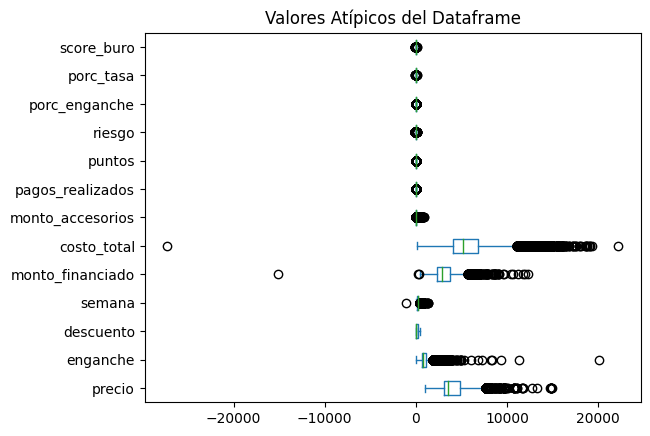

In [36]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_desv.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama


In [37]:

#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_desv
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido precio               8081.558082
enganche             2356.496845
descuento             478.215020
semana                541.287392
monto_financiado     6366.317810
costo_total         12857.588246
monto_accesorios      191.260880
pagos_realizados       39.306132
puntos                 42.386431
riesgo                 55.795398
porc_enganche          18.135840
porc_tasa              24.630537
score_buro             13.931194
dtype: float64
Limite inferior permitido precio               -87.484900
enganche            -503.622066
descuento           -321.263535
semana               -65.792692
monto_financiado    -214.044583
costo_total        -1458.203597
monto_accesorios    -164.333344
pagos_realizados     -18.944575
puntos               -14.217221
riesgo               -43.548316
porc_enganche        -16.334824
porc_tasa            -21.606103
score_buro           -14.442358
dtype: float64


<ipython-input-37-de3b2ccdb0d4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-37-de3b2ccdb0d4>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-37-de3b2ccdb0d4>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

In [38]:
#Encontramos Ouliers del Dataframe
outliers= df_desv[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-38-71fffbc27762>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= df_desv[(y>Limite_Superior)|(y<Limite_Inferior)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.40,NaN,NaN,NaN
22731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,NaN,NaN,NaN
22732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.65,NaN,NaN,NaN
22733,9799.0,2799.0,NaN,NaN,7000.0,15054.0,NaN,NaN,NaN,NaN,-17.35,NaN,NaN,NaN


In [39]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df_desv1= df_desv[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_desv1

<ipython-input-39-ed1c6d13253c>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_desv1= df_desv[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.00,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,NaN,-1.13,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,NaN,7.48,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,NaN,0.75,0.0,NaN
22733,NaN,NaN,0.0,386.0,NaN,NaN,0.0,0.0,14.1,14.0,NaN,-0.14,0.0,NaN


In [40]:
#Corroboramos valores nulos del dataframe
valores_nulos=df_desv1.isnull().sum()
valores_nulos

precio                110
enganche              292
descuento              17
semana                362
monto_financiado      182
costo_total           290
monto_accesorios      617
pagos_realizados      184
puntos                954
riesgo                 66
porc_enganche         486
porc_tasa             899
score_buro            582
semana_actual       22735
dtype: int64

In [41]:
#llenamos con media
df_desv1=df_desv1.fillna(round(df_desv1.mean(),1))
df_desv1

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.00,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,0.2,-1.13,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,0.2,7.48,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,0.2,0.75,0.0,NaN
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,0.0,14.1,14.0,0.2,-0.14,0.0,NaN


In [42]:

Datos_credicel_limpios2= pd.concat([cualitativos, df_desv1], axis=1)
Datos_credicel_limpios2

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,...,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,...,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,...,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.00,0.0,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,...,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.00,0.0,NaN
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,...,3224.0,6942.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,...,3052.0,5486.0,0.0,0.0,14.1,10.0,0.2,-1.13,0.0,NaN
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,...,2891.0,5200.0,0.0,0.0,14.1,9.0,0.2,7.48,0.0,NaN
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,...,3697.0,6656.0,0.0,0.0,14.1,11.0,0.2,0.75,0.0,NaN
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,...,3043.8,5588.6,0.0,0.0,14.1,14.0,0.2,-0.14,0.0,NaN


In [43]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_credicel_limpios2.isnull().sum()
valores_nulos

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                   0
inversion                 0
reautorizacion            0
fecha_ultimo_pago         0
fecha_pago_proximo        0
status_cuenta             0
codigo_postal             0
razones_buro              0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
pagos_realizados          0
puntos                    0
riesgo                    0
porc_enganche             0
porc_tasa                 0
score_buro                0
semana_actual         22735
dtype: int64

In [44]:
#Convertir DataFrame a CSV
Datos_credicel_limpios2.to_csv("Datos_credicel_limpios2.csv")

In [45]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_credicel_limpios2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

COMBINACIÓN 3: NULOS MEDIANA Y RANGO INTERCUARTILICO

In [46]:
df2 = pd.read_excel('cuentas_credicel.xlsx')

In [48]:
df2["riesgo"]=df2["riesgo"].replace({"Atraso":00}, regex=False)
df2["riesgo"]=df2["riesgo"].replace({"Cancelado":00} , regex=False)
df2["riesgo"]=df2["riesgo"].replace({"Fraude":00}, regex=False)
#df["riesgo"]=df["riesgo"].replace({" ":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"''":""}, regex=False)
#df["riesgo"]=df["riesgo"].replace({"'":""}, regex=False)
df2['riesgo']= df2['riesgo'].astype(float)

In [49]:
df2["porc_enganche"]=df2["porc_enganche"].replace({" ":00}, regex=False)
df2["porc_enganche"]=df2["porc_enganche"].replace({"":00}, regex=False)
df2['porc_enganche']= df2['porc_enganche'].astype(float)

In [50]:
#vvariables cuantitativas
df2["fecha_ultimo_pago"] =df2["fecha_ultimo_pago"].fillna(method="bfill")
df2["fecha_pago_proximo"] =df2["fecha_pago_proximo"].fillna(method="bfill")
df2["puntos"]=df2["puntos"].fillna(round(df["puntos"].median(),1))
df2["riesgo"]=df2["riesgo"].fillna(round(df["riesgo"].median(),1))
df2["porc_enganche"]=df2["porc_enganche"].fillna(round(df["porc_enganche"].median(),1))
df2["semana_actual"] =df2["semana_actual"].fillna(00)

In [51]:
#Variables cualitativas
df2["status_cuenta"] =df2["status_cuenta"].fillna("DESCONOCIDO")
df2["codigo_postal"] =df2["codigo_postal"].fillna("DESCONOCIDO")
df2["razones_buro"] =df2["razones_buro"].fillna("DESCONOCIDO")
df2["empresa"] =df2["empresa"].fillna("DESCONOCIDO")

In [52]:
#Otras Variables
df2["codigo_postal"] =df2["codigo_postal"].fillna(0)

In [53]:
#Corroboramos valores nulos
valores_nulos=df2.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

MÉTODO: RANGO INTERCUARTILICO

In [54]:
df2_intercuartilico=df.loc[ : , ["precio", "enganche", "descuento", "semana", "monto_financiado", "costo_total", "monto_accesorios",
                                "pagos_realizados", "puntos", "riesgo", "porc_enganche", "porc_tasa", "score_buro", "semana_actual"]]
df2_intercuartilico

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


In [55]:
df2_cuali=df.loc[ : , ["folio", "tag", "folio_solicitud", "fecha", "marca", "modelo", "plazo", "agente_venta", "dis_venta", "status",
                       "fraude", "empresa", "inversion", "reautorizacion", "fecha_ultimo_pago", "fecha_pago_proximo", "status_cuenta",
                       "codigo_postal","razones_buro"]]
df2_cuali

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,fraude,empresa,inversion,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,codigo_postal,razones_buro
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,DESCONOCIDO,0
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,DESCONOCIDO,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,2022-03-05 00:00:00,2022-03-12,Mora,74,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,0,servicel,0,0,2023-04-18 18:45:00,2023-04-25,DESCONOCIDO,0,0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,0,pixelulares,0,0,2023-04-18 18:46:53,2023-04-25,DESCONOCIDO,0,0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,0,DESCONOCIDO,0,0,2023-04-18 18:47:47,2023-04-25,DESCONOCIDO,0,0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,0,grupoph,0,0,2023-04-18 18:49:08,2023-04-25,DESCONOCIDO,0,0


<Figure size 1500x800 with 0 Axes>

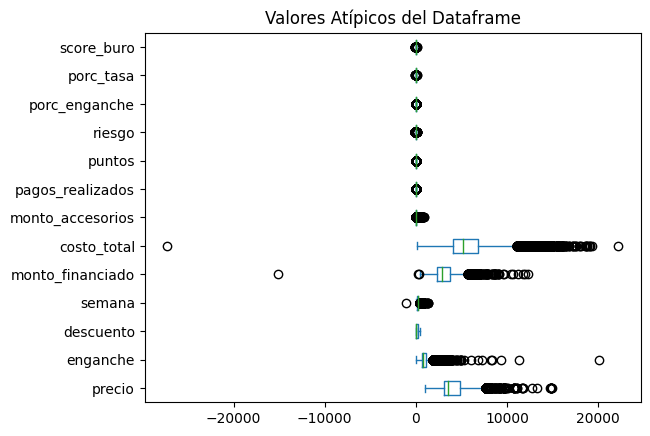

In [56]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df2_intercuartilico.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [57]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df2_intercuartilico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido precio               7674.000
enganche             1841.750
descuento             500.000
semana                457.500
monto_financiado     5703.000
costo_total         11108.500
monto_accesorios        0.000
pagos_realizados       34.500
puntos                 18.750
riesgo                 51.675
porc_enganche           5.230
porc_tasa               0.000
score_buro              0.000
dtype: float64
Limite inferior permitido precio              274.000
enganche           -104.250
descuento          -300.000
semana               -2.500
monto_financiado    359.000
costo_total        -175.500
monto_accesorios      0.000
pagos_realizados    -17.500
puntos                6.350
riesgo              -34.525
porc_enganche        -5.650
porc_tasa             0.000
score_buro            0.000
dtype: float64


<ipython-input-57-7bf445c1ce1c>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-57-7bf445c1ce1c>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [58]:
#Encontramos Outliers del Dataframe
outliers_iqr= df2_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-58-e1d7757f7a3e>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= df2_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.40,-1.13,NaN,NaN
22731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,7.48,NaN,NaN
22732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.65,0.75,NaN,NaN
22733,9799.0,2799.0,NaN,NaN,7000.0,15054.0,NaN,NaN,NaN,NaN,-17.35,-0.14,NaN,NaN


In [59]:
#Obtenemos datos limpios del Dataframe
data_iqr= df2_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-59-dfbdefd5dd47>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= df2_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.0,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,NaN,NaN,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,NaN,NaN,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,NaN,NaN,0.0,NaN
22733,NaN,NaN,0.0,386.0,NaN,NaN,0.0,0.0,14.1,14.0,NaN,NaN,0.0,NaN


In [60]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

precio                309
enganche              871
descuento               0
semana                946
monto_financiado      497
costo_total           787
monto_accesorios     1854
pagos_realizados      534
puntos               4415
riesgo                193
porc_enganche        1917
porc_tasa            3044
score_buro           1806
semana_actual       22735
dtype: int64

In [61]:
#Reemplazamos valores atípicos (nulos) con "mean"
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,0.0,0.0,0.0,0.0,NaN
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,0.0,14.1,6.1,0.9,0.0,0.0,NaN
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,0.0,12.1,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,0.0,14.1,10.0,-0.4,0.0,0.0,NaN
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,0.0,14.1,9.0,-0.4,0.0,0.0,NaN
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,0.0,14.1,11.0,-0.4,0.0,0.0,NaN
22733,3935.5,866.9,0.0,386.0,3001.8,5448.5,0.0,0.0,14.1,14.0,-0.4,0.0,0.0,NaN


In [62]:
Datos_credicel_limpios3= pd.concat([df2_cuali, df2_intercuartilico], axis=1)
Datos_credicel_limpios3

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,status,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,2,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,2,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,3,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,2,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,1,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,1,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,1,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,1,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,1,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


In [63]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_credicel_limpios3.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
codigo_postal         0
razones_buro          0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
pagos_realizados      0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
semana_actual         0
dtype: int64

In [64]:
#Convertir DataFrame a CSV
Datos_credicel_limpios3.to_csv("Datos_credicel_limpios3.csv")

In [65]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_credicel_limpios3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>